In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("pollutant-standards-index-southtangerang-2020-2022.csv")
df

,Date,PM2.5,PM10,SO2,CO,O3,NO2,Max,Critical Component,Category
0,1/1/2020,45,30,2,69,19.0,0,69,CO,Moderate
1,1/2/2020,44,16,2,58,33.0,0,58,CO,Moderate
2,1/3/2020,43,12,2,46,18.0,0,46,CO,Good
3,1/4/2020,40,8,2,84,29.0,0,84,CO,Moderate
4,1/5/2020,38,8,3,50,0.0,0,50,CO,Good
...,...,...,...,...,...,...,...,...,...,...
1091,12/27/2022,50,19,16,12,NaN,4,19,PM2.5,Moderate
1092,12/28/2022,51,20,16,12,NaN,4,20,PM2.5,Moderate
1093,12/29/2022,52,21,16,13,NaN,4,21,PM2.5,Moderate
1094,12/30/2022,53,22,17,13,NaN,4,22,PM2.5,Moderate


In [3]:
df["O3"] = df["O3"].fillna(df["O3"].mean())

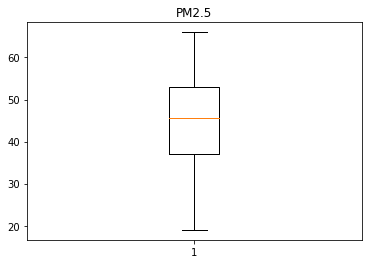

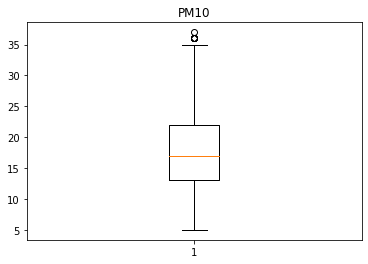

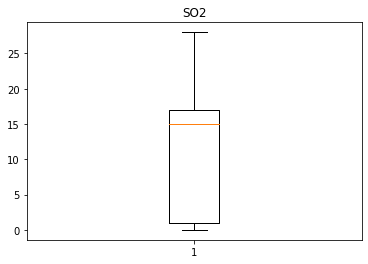

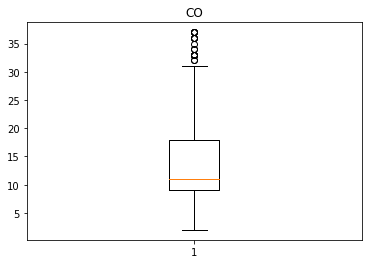

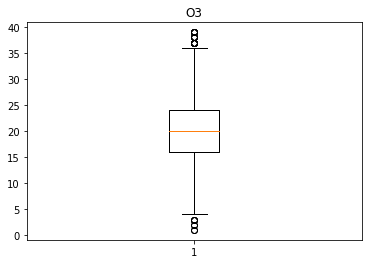

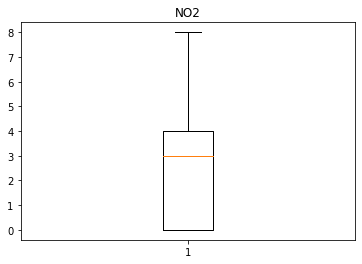

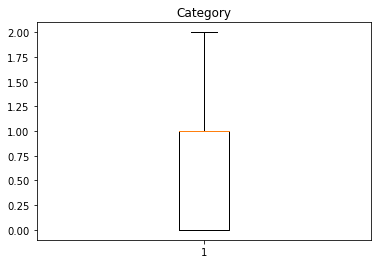

In [4]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Membuat salinan dataframe
df_copy = df[['PM2.5', 'PM10', 'SO2', 'CO', 'O3', 'NO2','Category']].copy()

# Label encoding untuk kolom 'Category'
label_encoder = LabelEncoder()
df_copy['Category'] = label_encoder.fit_transform(df_copy['Category'])

def remove_outliers(df_copy):
    df_result = df_copy.copy()  # Buat salinan dataframe untuk menyimpan hasil penghapusan outlier
    for col in df_copy.columns:
        Q1 = df_copy[col].quantile(0.25)
        Q3 = df_copy[col].quantile(0.75)
        IQR = Q3 - Q1
        upper_bound = Q3 + 1.5 * IQR
        lower_bound = Q1 - 1.5 * IQR
        df_result = df_result[(df_result[col] > lower_bound) & (df_result[col] < upper_bound)]
    return df_result

# Menghapus outlier
df_copy = remove_outliers(df_copy)

# Menampilkan boxplot
numerical = ['PM2.5', 'PM10', 'SO2', 'CO', 'O3', 'NO2']

for col in numerical:
    plt.boxplot(df_copy[col], vert=True)
    plt.title(col)
    plt.show()

# Tampilkan boxplot untuk kolom 'Category'
plt.boxplot(df_copy['Category'], vert=True)
plt.title('Category')
plt.show()


In [5]:
df_copy

,PM2.5,PM10,SO2,CO,O3,NO2,Category
12,31,11,2,29,8.000000,0,0
25,31,19,2,32,27.000000,0,0
30,26,17,1,33,24.000000,0,0
31,25,29,2,37,15.000000,0,0
65,53,19,4,21,20.000000,0,0
...,...,...,...,...,...,...,...
1091,50,19,16,12,20.960425,4,1
1092,51,20,16,12,20.960425,4,1
1093,52,21,16,13,20.960425,4,1
1094,53,22,17,13,20.960425,4,1


In [8]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Data X yang akan dinormalisasi (kecuali 'IE EXP (%)')
X_data = df_copy[['PM2.5', 'PM10', 'SO2', 'CO', 'O3', 'NO2']]

# Inisialisasi MinMaxScaler untuk X
scaler_X = MinMaxScaler()
X_normalized = scaler_X.fit_transform(X_data)

# Mengganti kolom-kolom dalam data_model dengan data yang sudah dinormalisasi
df_copy[['PM2.5', 'PM10', 'SO2', 'CO', 'O3', 'NO2']] = X_normalized

# Kolom 'IE EXP (%)' tidak perlu dinormalisasi
# Sekarang Anda dapat menggabungkan data yang sudah dinormalisasi dengan 'IE EXP (%)'
df = df_copy

In [9]:
df

,PM2.5,PM10,SO2,CO,O3,NO2,Category
12,0.255319,0.18750,0.071429,0.771429,0.184211,0.0,0
25,0.255319,0.43750,0.071429,0.857143,0.684211,0.0,0
30,0.148936,0.37500,0.035714,0.885714,0.605263,0.0,0
31,0.127660,0.75000,0.071429,1.000000,0.368421,0.0,0
65,0.723404,0.43750,0.142857,0.542857,0.500000,0.0,0
...,...,...,...,...,...,...,...
1091,0.659574,0.43750,0.571429,0.285714,0.525274,0.5,1
1092,0.680851,0.46875,0.571429,0.285714,0.525274,0.5,1
1093,0.702128,0.50000,0.571429,0.314286,0.525274,0.5,1
1094,0.723404,0.53125,0.607143,0.314286,0.525274,0.5,1


In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X = df.drop(["Category"], axis=1)
y = df["Category"]

In [12]:
from imblearn.over_sampling import SMOTE  # imblearn untuk penanganan ketidakseimbangan kelas (Oversampling)
# Melakukan oversampling dengan SMOTE
smote = SMOTE(random_state=42) #Memangil SMOTE dengan random state 42  menghasilkan hasil yang dapat direproduksi secara konsisten. 
X_resampled, y_resampled = smote.fit_resample(X, y) # menyimpan hasil over samping tersebut pada x y resampled

In [20]:
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc, log_loss
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)
    
# Membuat model CatBoost
catboost_classifier = CatBoostClassifier(random_state=42, verbose=0)

# Melatih model
catboost_classifier.fit(X_train, y_train)

# Melakukan prediksi pada data testing
y_pred = catboost_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"\nRatio {0.2*100:.0f}:{(1-0.2)*100:.0f}")
print("Accuracy:", accuracy)

report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)


Ratio 20:80
Accuracy: 0.9413680781758957
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.92      0.91        88
           1       0.93      0.89      0.91       104
           2       0.98      1.00      0.99       115

    accuracy                           0.94       307
   macro avg       0.94      0.94      0.94       307
weighted avg       0.94      0.94      0.94       307



In [21]:
import pickle

# Simpan model ke dalam file pickle
with open('catboost_model_revisi.pkl', 'wb') as model_file:
    pickle.dump(catboost_classifier, model_file)

# Memuat kembali model dari file pickle
with open('catboost_model_revisi.pkl', 'rb') as model_file:
    loaded_catboost_model = pickle.load(model_file)

# Gunakan model yang telah dimuat kembali untuk membuat prediksi
loaded_y_pred = loaded_catboost_model.predict(X_test)

# Periksa akurasi setelah memuat kembali model
loaded_accuracy = accuracy_score(y_test, loaded_y_pred)
print("Accuracy after loading the model:", loaded_accuracy)

Accuracy after loading the model: 0.9413680781758957
